#Vectorization in Natural Language Processing
Vectorization in NLP is the process of converting textual data into numerical format so that machine learning models can process it. Since computers cannot understand raw text, vectorization helps represent words and sentences as mathematical vectors while preserving their meaning and relationships.

Why is Vectorization Needed?
-  Makes text machine-readable – NLP models require numerical inputs.
-  Captures relationships between words – Helps identify similarities and meaning.
-  Improves computational efficiency – Reduces text complexity for faster processing.
-  Enables machine learning applications – Used in text classification, search engines, chatbots, and more.

**Types of Vectorization in NLP**
1. Count-Based Methods

These methods convert text into numerical vectors based on word frequency.

- Bag of Words (BoW) – Represents text as word frequency counts, ignoring context.
- TF-IDF (Term Frequency - Inverse Document Frequency) – Weighs words based on their importance in a document.
2. Word Embedding Methods

 These methods create dense vector representations of words based on their meaning.

- Word2Vec – Uses neural networks to capture word relationships.

3. Contextual Embeddings (Deep Learning)

 Advanced models that understand word meanings based on context.

- BERT (Bidirectional Encoder Representations from Transformers) – Assigns different meanings to words based on surrounding words.



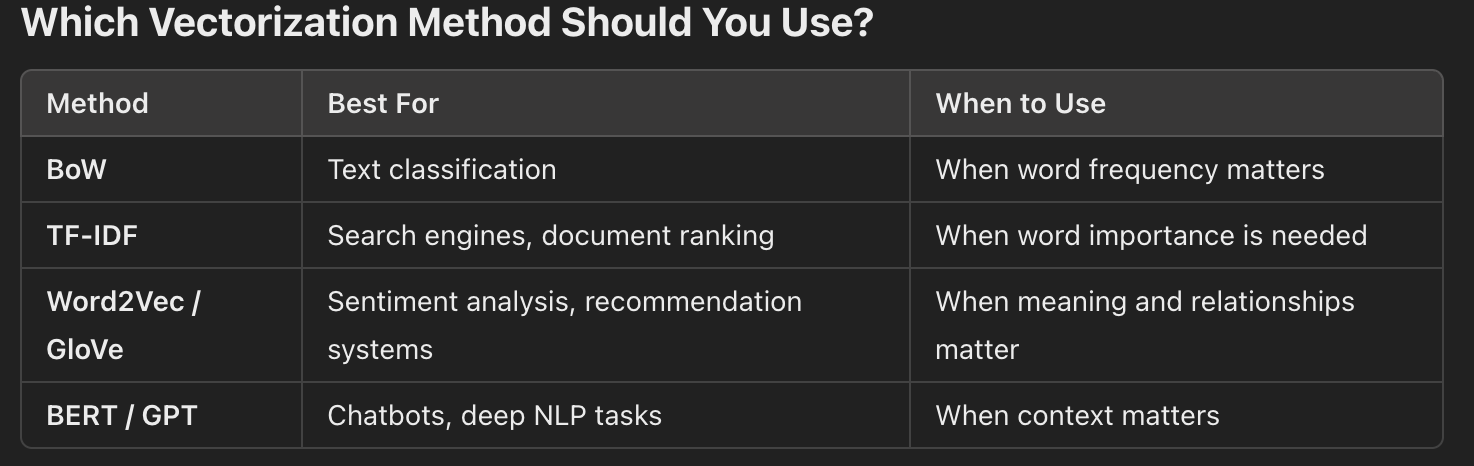

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
import tensorflow as tf
import tensorflow_hub as hub
import nltk
import string
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Sample Text Data
documents = [
    "Natural Language Processing is amazing!",
    "Machine learning helps in NLP applications.",
    "Deep learning improves NLP and AI models.",
    "Word embeddings capture semantic meaning."
]

##Bag Of Words
Bag of Words (BoW) is a simple method for converting text into numerical form by counting how often each word appears in a document. It creates a matrix where each row represents a document, and each column represents a word from the entire dataset. The value in each cell is the number of times that word appears in the document. BoW ignores word order and meaning, focusing only on frequency.

In [ ]:
# 1. Bag of Words (BoW)
vectorizer_bow = CountVectorizer()
bow_matrix = vectorizer_bow.fit_transform(documents).toarray()
bow_df = pd.DataFrame(bow_matrix, columns=vectorizer_bow.get_feature_names_out())
print("Bag of Words Representation:")
display(bow_df)

Bag of Words Representation:


ai  amazing  and  applications  capture  deep  embeddings  helps  improves  \
0   0        1    0             0        0     0           0      0         0   
1   0        0    0             1        0     0           0      1         0   
2   1        0    1             0        0     1           0      0         1   
3   0        0    0             0        1     0           1      0         0   

   in  ...  language  learning  machine  meaning  models  natural  nlp  \
0   0  ...         1         0        0        0       0        1    0   
1   1  ...         0         1        1        0       0        0    1   
2   0  ...         0         1        0        0       1        0    1   
3   0  ...         0         0        0        1       0        0    0   

   processing  semantic  word  
0           1         0     0  
1           0         0     0  
2           0         0     0  
3           0         1     1  

[4 rows x 21 columns]

This shows us how many times words have appeared in our dataset.
AI has appeared 2 times
amazing has appeared 1 time
etc.

###Cosine similarity
Cosine Similarity is essential in Natural Language Processing (NLP) because it helps measure the similarity between two text documents based on their vector representations. Since words and sentences are converted into numerical vectors, cosine similarity helps determine how closely related two pieces of text are, regardless of their length.

In [ ]:
# Cosine Similarity for BoW
cosine_sim_bow = cosine_similarity(bow_matrix)
cosine_sim_bow_df = pd.DataFrame(cosine_sim_bow, index=documents, columns=documents)
print("Cosine Similarity (BoW):")
display(cosine_sim_bow_df)

Cosine Similarity (BoW):


Natural Language Processing is amazing!  \
Natural Language Processing is amazing!                                          1.0   
Machine learning helps in NLP applications.                                      0.0   
Deep learning improves NLP and AI models.                                        0.0   
Word embeddings capture semantic meaning.                                        0.0   

                                             Machine learning helps in NLP applications.  \
Natural Language Processing is amazing!                                         0.000000   
Machine learning helps in NLP applications.                                     1.000000   
Deep learning improves NLP and AI models.                                       0.308607   
Word embeddings capture semantic meaning.                                       0.000000   

                                             Deep learning improves NLP and AI models.  \
Natural Language Processing is amazing!                                       0.000000   
Machine learning helps in NLP applications.                                   0.308607   
Deep learning improves NLP and AI models.                                     1.000000   
Word embeddings capture semantic meaning.                                     0.000000   

                                             Word embeddings capture semantic meaning.  
Natural Language Processing is amazing!                                            0.0  
Machine learning helps in NLP applications.                                        0.0  
Deep learning improves NLP and AI models.                                          0.0  
Word embeddings capture semantic meaning.                                          1.0

###BagofWords Demo- Text classification for Movie reviews

The example code demonstrates sentiment classification (positive/negative) for movie reviews.



In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [3]:
# Sample dataset
texts = [
    "I love this movie, it's amazing",
    "Great film, highly recommended",
    "Terrible movie, waste of time",
    "I hate this movie, it's awful",
    "Excellent acting and direction",
    "Poor acting, bad script",
    "Wonderful cinema experience",
    "Complete disaster, avoid watching"
]

In [4]:
# Labels: 1 for positive, 0 for negative
labels = np.array([1, 1, 0, 0, 1, 0, 1, 0])


**Why Use Bag of Words (BoW) for Text Classification?**
1. Simple and Effective: BoW converts text into numerical vectors by counting word occurrences, making it easy to implement and understand.

2. Good for Basic Tasks: Ideal for tasks like spam detection and topic classification, where word patterns matter more than context.

3. Works with ML Models: Traditional models (e.g., Naïve Bayes, Logistic Regression) handle BoW vectors efficiently.

4. Efficient for Small Data: Requires minimal preprocessing and works well even with small datasets.

In [5]:
# Create Bag of Words vectorizer
vectorizer = CountVectorizer(
    lowercase=True,
    stop_words='english',
    min_df=1  # minimum document frequency
)

In [6]:
# Convert text to Bag of Words representation
X = vectorizer.fit_transform(texts)

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.25, random_state=42
)


In [8]:
print(X_train)

  (0, 15)	1
  (0, 16)	1
  (0, 1)	1
  (1, 6)	1
  (1, 8)	1
  (1, 2)	1
  (1, 23)	1
  (2, 16)	1
  (2, 20)	1
  (2, 22)	1
  (2, 21)	1
  (3, 9)	1
  (3, 0)	1
  (3, 7)	1
  (4, 16)	1
  (4, 13)	1
  (4, 3)	1
  (5, 24)	1
  (5, 5)	1
  (5, 10)	1


In [9]:
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)


MultinomialNB()

Naïve Bayes is simple, fast, and works well for many text classification tasks like spam detection, sentiment analysis, and topic classification. Here's why:

1. Handles High-Dimensional Text Data:

- Text data (like words in sentences) is often converted into large vectors using methods like Bag of Words or TF-IDF.
- Naïve Bayes easily processes these large, sparse vectors.
2. Uses Probabilities:

- It calculates the probability of a text belonging to a category based on word occurrences.
- For example: If "discount" and "offer" appear often in spam emails, it will classify emails with these words as spam.
3. Fast and Efficient:

- It’s quick to train and predict because it assumes that words occur independently (the "naïve" assumption).
4. Works Well with Small Data:

- Naïve Bayes doesn’t need large datasets to perform well.
5. Feature Importance:

- It automatically identifies important words for each category (e.g., "win" for spam or "meeting" for not spam).

In [10]:
# Make predictions
y_pred = classifier.predict(X_test)

In [11]:
# Print vocabulary
print("Vocabulary:")
print(sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1]))

Vocabulary:
[('acting', 0), ('amazing', 1), ('avoid', 2), ('awful', 3), ('bad', 4), ('cinema', 5), ('complete', 6), ('direction', 7), ('disaster', 8), ('excellent', 9), ('experience', 10), ('film', 11), ('great', 12), ('hate', 13), ('highly', 14), ('love', 15), ('movie', 16), ('poor', 17), ('recommended', 18), ('script', 19), ('terrible', 20), ('time', 21), ('waste', 22), ('watching', 23), ('wonderful', 24)]


In [12]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
# Function to classify new text
def classify_text(text):
    # Transform the text using the same vectorizer
    text_bow = vectorizer.transform([text])
    # Make prediction
    prediction = classifier.predict(text_bow)
    probability = classifier.predict_proba(text_bow)

    sentiment = "Positive" if prediction[0] == 1 else "Negative"
    confidence = max(probability[0]) * 100

    return f"Text: '{text}'\nSentiment: {sentiment}\nConfidence: {confidence:.2f}%"

In [14]:
# Example usage
print("\nTesting new texts:")
test_texts = [
    "This movie is really good",
    "What a terrible waste of money"
]

for text in test_texts:
    print("\n" + classify_text(text))


Testing new texts:

Text: 'This movie is really good'
Sentiment: Negative
Confidence: 58.62%

Text: 'What a terrible waste of money'
Sentiment: Negative
Confidence: 78.11%


## TF-IDF Vectorization
TF-IDF (Term Frequency-Inverse Document Frequency) vectorization is a numerical representation technique used in Natural Language Processing (NLP) to convert text data into meaningful numerical features. It measures the importance of a word in a document relative to a collection (corpus) of documents. TF (Term Frequency) counts how often a word appears in a document, while IDF (Inverse Document Frequency) reduces the weight of commonly occurring words, giving higher importance to rare but significant words. The TF-IDF score helps in tasks like text classification, information retrieval, and keyword extraction by highlighting the most relevant words in a document while filtering out less informative ones.

In [ ]:
# 2. TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents).toarray()
tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Representation:")
display(tfidf_df)

TF-IDF Representation:


ai   amazing       and  applications   capture      deep  embeddings  \
0  0.000000  0.447214  0.000000      0.000000  0.000000  0.000000    0.000000   
1  0.000000  0.000000  0.000000      0.436719  0.000000  0.000000    0.000000   
2  0.400218  0.000000  0.400218      0.000000  0.000000  0.400218    0.000000   
3  0.000000  0.000000  0.000000      0.000000  0.447214  0.000000    0.447214   

      helps  improves        in  ...  language  learning   machine   meaning  \
0  0.000000  0.000000  0.000000  ...  0.447214  0.000000  0.000000  0.000000   
1  0.436719  0.000000  0.436719  ...  0.000000  0.344315  0.436719  0.000000   
2  0.000000  0.400218  0.000000  ...  0.000000  0.315537  0.000000  0.000000   
3  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.447214   

     models   natural       nlp  processing  semantic      word  
0  0.000000  0.447214  0.000000    0.447214  0.000000  0.000000  
1  0.000000  0.000000  0.344315    0.000000  0.000000  0.000000  
2  0.400218  0.000000  0.315537    0.000000  0.000000  0.000000  
3  0.000000  0.000000  0.000000    0.000000  0.447214  0.447214  

[4 rows x 21 columns]

In [ ]:
# Cosine Similarity for TF-IDF
cosine_sim_tfidf = cosine_similarity(tfidf_matrix)
cosine_sim_tfidf_df = pd.DataFrame(cosine_sim_tfidf, index=documents, columns=documents)
print("Cosine Similarity (TF-IDF):")
display(cosine_sim_tfidf_df)

Cosine Similarity (TF-IDF):


Natural Language Processing is amazing!  \
Natural Language Processing is amazing!                                          1.0   
Machine learning helps in NLP applications.                                      0.0   
Deep learning improves NLP and AI models.                                        0.0   
Word embeddings capture semantic meaning.                                        0.0   

                                             Machine learning helps in NLP applications.  \
Natural Language Processing is amazing!                                         0.000000   
Machine learning helps in NLP applications.                                     1.000000   
Deep learning improves NLP and AI models.                                       0.217288   
Word embeddings capture semantic meaning.                                       0.000000   

                                             Deep learning improves NLP and AI models.  \
Natural Language Processing is amazing!                                       0.000000   
Machine learning helps in NLP applications.                                   0.217288   
Deep learning improves NLP and AI models.                                     1.000000   
Word embeddings capture semantic meaning.                                     0.000000   

                                             Word embeddings capture semantic meaning.  
Natural Language Processing is amazing!                                            0.0  
Machine learning helps in NLP applications.                                        0.0  
Deep learning improves NLP and AI models.                                          0.0  
Word embeddings capture semantic meaning.                                          1.0

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

###Using TF-IDF for document ranking


The example shows a basic document search system with four sample documents about technology topics.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Sample documents
documents = [
    "Machine learning is a type of artificial intelligence",
    "Python is a programming language",
    "Natural language processing deals with text analysis",
    "Data science involves statistics and programming"
]


In [ ]:
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

In [ ]:
# Calculate TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(documents)

In [ ]:
# Function to search documents
def search_documents(query, documents, vectorizer, tfidf_matrix):
    # Transform search query using the same vectorizer
    query_vector = vectorizer.transform([query])

    # Calculate similarity between query and documents
    similarities = cosine_similarity(query_vector, tfidf_matrix)[0]

    # Sort documents by similarity score
    ranked_results = list(enumerate(similarities))
    ranked_results.sort(key=lambda x: x[1], reverse=True)

    # Return ranked documents
    for i, score in ranked_results:
        print(f"Score: {score:.4f} - Document: {documents[i]}")

# Example search
print("Search results for 'machine learning':")
search_documents("machine learning", documents, vectorizer, tfidf_matrix)

print("\nSearch results for 'programming':")
search_documents("programming", documents, vectorizer, tfidf_matrix)

Search results for 'machine learning':
Score: 0.5496 - Document: Machine learning is a type of artificial intelligence
Score: 0.0000 - Document: Python is a programming language
Score: 0.0000 - Document: Natural language processing deals with text analysis
Score: 0.0000 - Document: Data science involves statistics and programming

Search results for 'programming':
Score: 0.4658 - Document: Python is a programming language
Score: 0.3325 - Document: Data science involves statistics and programming
Score: 0.0000 - Document: Machine learning is a type of artificial intelligence
Score: 0.0000 - Document: Natural language processing deals with text analysis


When we search for "machine learning", here's what happens:

1. The Search Process:


- The system looks at how important "machine" and "learning" are in each document
- Document 1 ranks highest because it contains both terms
- Other documents rank lower because they don't contain these specific terms


2. When we search for "programming":


- Documents 2 and 4 rank higher because they contain "programming"
- Documents 1 and 3 rank lower because they don't have this term

Real Application of This Example:

- This is like a very simple version of a technical documentation search
Imagine if these were longer technical articles or documentation pages
Users could find relevant technical content based on their search terms
- The system automatically understands that technical terms are more important than common words

For example, if a developer searches for "programming":

- They'll see Python and data science documents first
- Machine learning and NLP documents appear lower in results
- This matches what they're likely looking for

The system is smart enough to:

- Understand that technical terms like "Python" and "machine learning" are more important than common words like "is" and "a"
- Rank documents based on how well they match the search terms
- Consider both exact matches and related technical terms

##Word2Vec
Word2Vec embeddings are a popular technique in Natural Language Processing (NLP) for representing words as dense, continuous vector representations in a multi-dimensional space. Developed by Google, Word2Vec models use neural networks to capture the semantic meaning of words based on their context within a corpus. The two main training approaches are CBOW (Continuous Bag of Words), which predicts a target word from its surrounding context, and Skip-Gram, which predicts the context words from a target word. Unlike traditional one-hot encoding or TF-IDF, Word2Vec embeddings place semantically similar words closer together in the vector space, enabling tasks like analogy reasoning (e.g., "king - man + woman ≈ queen") and improved performance in downstream NLP applications such as sentiment analysis and machine translation.

In [ ]:
# 3. Word2Vec Embeddings
tokenized_docs = [nltk.word_tokenize(doc.translate(str.maketrans('', '', string.punctuation)).lower()) for doc in documents]
word2vec_model = Word2Vec(sentences=tokenized_docs, vector_size=5, window=2, min_count=1, workers=4)
word_vectors = {word: word2vec_model.wv[word] for word in word2vec_model.wv.index_to_key}
print("Word2Vec Embeddings:")
display(pd.DataFrame(word_vectors))

Word2Vec Embeddings:


nlp  learning   meaning  language  processing        is   amazing  \
0 -0.010719 -0.142343  0.147610 -0.036320    0.146235 -0.068107 -0.150232   
1  0.004709  0.129167 -0.030669  0.057532    0.101405 -0.018928 -0.018601   
2  0.102112  0.179459 -0.090732  0.019837    0.135154  0.115371  0.190762   
3  0.180196 -0.100319  0.131081 -0.165704    0.015257 -0.150433 -0.146383   
4 -0.186026 -0.075237 -0.097203 -0.188976    0.127018 -0.078722 -0.046675   

    machine     helps        in  ...  semantic      deep  improves       and  \
0 -0.038755 -0.192071 -0.005925  ... -0.089244 -0.031553  0.049381  0.109119   
1  0.161549  0.100146 -0.153224  ...  0.090350  0.006427 -0.017760  0.166908   
2 -0.118618 -0.175192  0.192305  ... -0.135739 -0.082813  0.110743 -0.029052   
3  0.000903 -0.087837  0.099659  ... -0.070970 -0.153654 -0.054818 -0.184155   
4 -0.095075 -0.000702  0.184645  ...  0.187970 -0.030160  0.045167  0.087413   

         ai    models      word  embeddings   capture   natural  
0  0.011436 -0.017142  0.037189    0.032616  0.101243 -0.172394  
1  0.148838  0.056541  0.121761    0.003810 -0.178369  0.073315  
2 -0.016266  0.108046 -0.095948    0.069489 -0.140813  0.103798  
3 -0.052768  0.141047 -0.062138    0.004366  0.018012  0.114839  
4 -0.175060 -0.114075  0.135964    0.192364  0.127876  0.149338  

[5 rows x 21 columns]

##BERT
BERT embeddings are context-aware word representations generated by the BERT (Bidirectional Encoder Representations from Transformers) model, developed by Google. Unlike traditional embeddings like Word2Vec, which produce static word vectors, BERT embeddings consider the context of a word in a sentence, allowing the same word to have different representations depending on its usage. This bidirectional approach enables BERT to understand the meaning of words by analyzing both their left and right contexts simultaneously. BERT embeddings have revolutionized NLP tasks like sentiment analysis, question answering, and text classification by capturing deeper semantic and syntactic relationships in text, making them highly effective for complex language understanding.

In [ ]:
# 4. BERT Embeddings
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
bert_embeddings = embed(documents).numpy()
bert_df = pd.DataFrame(bert_embeddings)
print("BERT Embeddings:")
display(bert_df)


BERT Embeddings:


0         1         2         3         4         5         6    \
0 -0.057012 -0.022645 -0.007127  0.009061  0.028061 -0.048818 -0.064633   
1  0.048102 -0.033211 -0.074293 -0.022145 -0.041653  0.012191 -0.072856   
2  0.046790 -0.034847 -0.058823 -0.061901 -0.064399 -0.023065 -0.050244   
3  0.045560  0.007938  0.058638 -0.014245  0.040157 -0.002823 -0.076608   

        7         8         9    ...       502       503       504       505  \
0  0.043227  0.080120  0.073752  ...  0.010449  0.065765  0.085243  0.011411   
1 -0.030453  0.038549  0.043518  ...  0.006399  0.054232 -0.001311 -0.054547   
2  0.015137 -0.027868  0.071856  ...  0.048378  0.067822 -0.004400  0.001115   
3 -0.015450 -0.016096  0.062629  ... -0.015533  0.022660  0.090814  0.012105   

        506       507       508       509       510       511  
0 -0.008787  0.006023  0.038040  0.065183 -0.008476 -0.022273  
1  0.008081 -0.052525  0.028100  0.076008 -0.057081 -0.070056  
2  0.061092 -0.008809  0.048022  0.077422 -0.036387 -0.070587  
3 -0.042671 -0.071749 -0.032075  0.070918 -0.053125  0.027752  

[4 rows x 512 columns]

In [ ]:
# Cosine Similarity for BERT
cosine_sim_bert = cosine_similarity(bert_embeddings)
cosine_sim_bert_df = pd.DataFrame(cosine_sim_bert, index=documents, columns=documents)
print("Cosine Similarity (BERT):")
display(cosine_sim_bert_df)


Cosine Similarity (BERT):


Natural Language Processing is amazing!  \
Natural Language Processing is amazing!                                     1.000000   
Machine learning helps in NLP applications.                                 0.340376   
Deep learning improves NLP and AI models.                                   0.348212   
Word embeddings capture semantic meaning.                                   0.282934   

                                             Machine learning helps in NLP applications.  \
Natural Language Processing is amazing!                                         0.340376   
Machine learning helps in NLP applications.                                     1.000000   
Deep learning improves NLP and AI models.                                       0.676960   
Word embeddings capture semantic meaning.                                       0.261574   

                                             Deep learning improves NLP and AI models.  \
Natural Language Processing is amazing!                                       0.348212   
Machine learning helps in NLP applications.                                   0.676960   
Deep learning improves NLP and AI models.                                     1.000000   
Word embeddings capture semantic meaning.                                     0.212863   

                                             Word embeddings capture semantic meaning.  
Natural Language Processing is amazing!                                       0.282934  
Machine learning helps in NLP applications.                                   0.261574  
Deep learning improves NLP and AI models.                                     0.212863  
Word embeddings capture semantic meaning.                                     1.000000

Cosine similarity is a measure of similarity between two vectors based on the cosine of the angle between them. The value lies in the range [-1, 1], depending on the orientation of the vectors:

- 1: Perfect similarity (vectors are identical and point in the same direction).
- 0: No similarity (vectors are orthogonal, i.e., at a 90° angle to each other).
- -1: Complete dissimilarity (vectors point in opposite directions).

The table represents the cosine similarity matrix calculated using BERT embeddings for a set of sentences. Here's the interpretation:

1. Matrix Layout
Rows and Columns: Each row and column correspond to one of the input sentences:

"Natural Language Processing is amazing!"
"Machine learning helps in NLP applications."
"Deep learning improves NLP and AI models."
"Word embeddings capture semantic meaning."
Cell Values: The numbers in the matrix represent the cosine similarity scores between the corresponding sentences.

2. Key Observations
Diagonal Values (1.000000):

Each sentence compared with itself has a cosine similarity of 1, as the vectors are identical.
"Natural Language Processing is amazing!"

- Similarity with "Machine learning helps in NLP applications." = 0.340376: Indicates some relevance between these sentences, but the similarity is relatively low.
- Similarity with "Deep learning improves NLP and AI models." = 0.348212: Similar to the previous sentence but slightly higher similarity.
- Similarity with "Word embeddings capture semantic meaning." = 0.282934: Least similar among the comparisons.
"Machine learning helps in NLP applications."

- Similarity with "Deep learning improves NLP and AI models." = 0.676960: Indicates strong semantic overlap, as both sentences are about machine learning and AI.
Similarity with "Word embeddings capture semantic meaning." = 0.261574: Shows lower similarity, as the topics diverge.
"Deep learning improves NLP and AI models."

- Similarity with "Word embeddings capture semantic meaning." = 0.212863: This is the lowest similarity overall, likely because the two sentences discuss different aspects of NLP and AI.
